In [7]:
from func.ultis import decompress_pickle, load_obj
import matplotlib.pyplot as plt

from func.run_pipeline_super_vox import reassign
import numpy as np

6

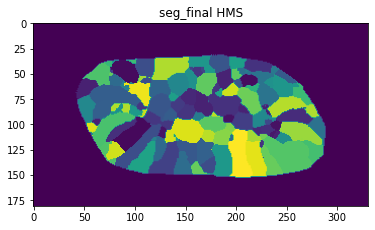

In [47]:
seg_final_HMS = decompress_pickle("../../masterthesis_results/HMS/edge_gated_gcn/65_seg_final.pbz2")
N=80

plt.figure()
plt.title("seg_final HMS")
plt.imshow(reassign(seg_final_HMS[:,:,N]))

In [19]:
raw_img_HMS = np.load("../data/CellSeg_dataset/HMS_processed/raw/65.npy")

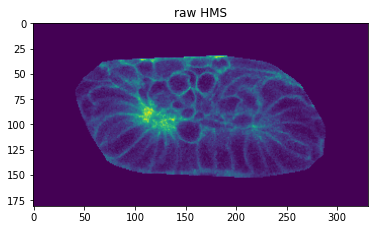

In [13]:
plt.figure()
plt.title("raw HMS")
plt.imshow(raw_img_HMS[:,:,N])

In [15]:
from func.plot_utils import create_rgb_image, make_outline_overlay


In [60]:
def make_colored_overlay(rgb_data, predictions):
    channel_to_color = 0
    preds = np.copy(predictions)
    rgbs = np.copy(rgb_data)
    preds[preds > 0.0] = 5
    # rgbs[...,channel_to_color] = preds.reshape(len(preds), 256, 256)
    rgbs[...,channel_to_color] = rgbs[...,channel_to_color]/10
    final_images = make_outline_overlay(rgb_data=rgbs, predictions=predictions)
    return final_images

In [61]:
raw_img_HMS_slice = raw_img_HMS[:,:,N]
raw_img_HMS_slice = np.expand_dims(raw_img_HMS_slice, axis=0)
raw_img_HMS_slice = np.expand_dims(raw_img_HMS_slice, axis=3)
# create rgb overlay of image data for visualization
rgb_images = create_rgb_image(raw_img_HMS_slice, channel_colors=['blue'])

# create overlay of predictions
# overlay_data_original = make_colored_overlay(rgb_data=rgb_images, predictions=segmentation_predictions_original)
# overlay_data_gt = make_colored_overlay(rgb_data=rgb_images, predictions=y_test[...,1:2])

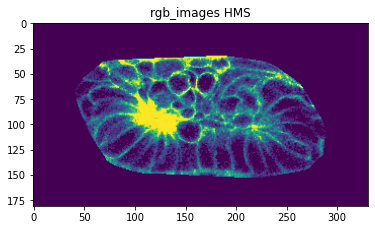

In [62]:
plt.figure()
plt.title("rgb_images HMS")
plt.imshow(rgb_images[0,:,:,2])

In [63]:
seg_final_HMS_slice = seg_final_HMS[:,:,N]
seg_final_HMS_slice = np.expand_dims(seg_final_HMS_slice, axis=0)
seg_final_HMS_slice = np.expand_dims(seg_final_HMS_slice, axis=3)
overlay_data = make_colored_overlay(rgb_data=rgb_images, predictions=seg_final_HMS_slice)

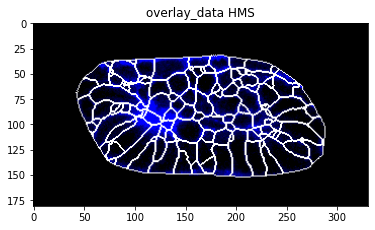

In [64]:
plt.figure()
plt.title("overlay_data HMS")
plt.imshow(overlay_data[0,...])